In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 


##Need to normalize data before training
##Learnin rate is clearly too high

#### Building the model

In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\anish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)
# , callbacks=[early_stop]

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5373 - loss: 200355.1250 - val_accuracy: 0.6386 - val_loss: 44574.5781
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5367 - loss: 52489.9688 - val_accuracy: 0.4766 - val_loss: 40799.8164
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5378 - loss: 40491.3789 - val_accuracy: 0.4206 - val_loss: 53705.2969
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5396 - loss: 40135.9062 - val_accuracy: 0.6293 - val_loss: 24756.6816
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5351 - loss: 27036.8379 - val_accuracy: 0.4704 - val_loss: 19955.1895
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5401 - loss: 28089.0801 - val_accuracy: 0.4081 - val_loss: 29082.5762
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 27617.9336 - val_accuracy: 0.6012 - val_loss: 11432.7520
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [6]:
model.evaluate(X_train, y_train)


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.6300 - loss: 24024.1211


[23682.3125, 0.6291784048080444]

In [7]:
model.evaluate(X_test, y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.6407 - loss: 23663.5762


[24249.201171875, 0.6264045238494873]

In [8]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
ROC AUC Score: 0.5057634730538922


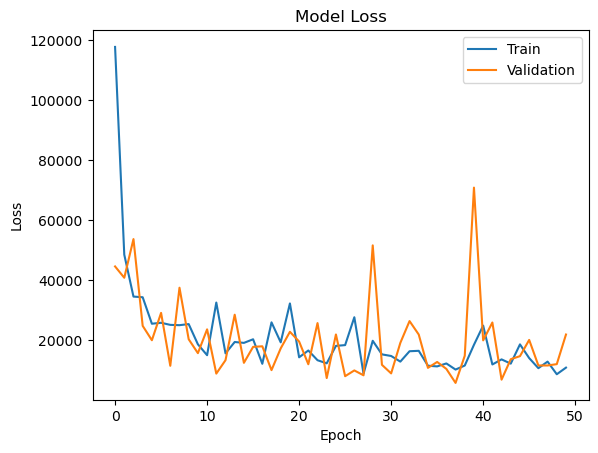

In [9]:
#plot the training and validation curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
import joblib
joblib.dump(model, 'ann.pkl')

['ann.pkl']